# REINFORCE algorithm

## 1. Algorithm and environment overview 

This notebook shows how to apply the REINFORCE algoritm to solve OpenAI Gym's [CartPole-v0](https://github.com/openai/gym/wiki/CartPole-v0) environment.

### 1.1 Overview

We use a neural network to apporixmate the optimal policy function (instead of keeping a table of value function estimates) and apply gradient ascent to find the optimal weights of the network i.e. the weights which maximize expected future returns. The neural network takes the current state as input and outputs a discrete probability distribution over the action set.

If we let $\theta$ denote the weights of the neural network and $U(\theta)$ the expected future rewards.  We want to solve the problem 

$$max_\theta E_{\pi_{\theta}}[R(\tau)]$$

where the expectation is taken over all possible state-action sequences, also called trajectories, of (horizon) lenght H $\tau = (s_{0}, a_{0},...,s_{H}, a_{H},s_{H+1})$ 

### 1.2 The REINFORCE algorithm 

The REINFORCE algorithm solves the optimization problem above in the following steps: 

1. Use policy $\pi_\theta$ determined by the weights of the nueral network to generate $m$ trajectories $\{\tau^{(1)}, \tau^{(2)},..., \tau^{(m)} \}$ with (horizon) length $H$ where the i-th trajectory is defined as the collection of state action pairs

$$ \tau^{(i)} = (s_{0}^{(i)}, a_{0}^{(i)},...,s_{H}^{(i)}, a_{H}^{(i)},s_{H+1}^{(i)}) $$


2. Use the trajectories to estimate the gradient $\triangledown{_\theta} U(\theta)$ 

\begin{equation*}
max_\theta E_{\pi_{\theta}}[R(\tau)] \approx \hat{g} := \frac{1}{m} \sum_{i=1}^{m} \sum_{t=0}^{H} \triangledown{_\theta} \text{log}_{\pi_{\theta}}(a_{t}^{(i)}|s_{t}^{(i)})R(\tau^{(i)}) 
\label{eq:grad_approx} \tag{1}
\end{equation*}

3. Update the weights of the policy: 
$$ \theta \leftarrow \theta + \alpha \hat{g} $$

4. Loop over steps 1-3

### 1.3 The REINFORCE gradient approximation

The crucial ingredient in the REINFORCE algorithm is the approximation formula in $\eqref{eq:grad_approx}$. The derivation is shown below:

\begin{align*}
\triangledown{_\theta} E_{\pi_{\theta}}[R(\tau)] 
&= \triangledown{_\theta} \sum_{\tau} P(\tau;\theta) R(\tau) \tag{def. of expectation} \\
&= \sum_{\tau} \triangledown{_\theta} P(\tau;\theta) R(\tau) \tag{gradient is a linear operator} \\
&= \sum_{\tau} \frac{P(\tau;\theta)}{P(\tau;\theta)} \triangledown{_\theta} P(\tau;\theta) R(\tau) \tag{multilply by 1} \\
&= \sum_{\tau} P(\tau;\theta)\frac{\triangledown{_\theta} P(\tau;\theta)}{P(\tau;\theta)}  R(\tau) \tag{rewrite} \\
&= \sum_{\tau} P(\tau;\theta) \triangledown{_\theta} \text{log}P(\tau;\theta)  R(\tau) \tag{def. of derivative of log(x)} \\
\end{align*}

In the final line the transformation $\triangledown{_\theta} \text{log}P(\tau;\theta) = \frac{\triangledown{_\theta}P(\tau;\theta)}{P(\tau;\theta)} $ is known as the **likelihood ratio transformation** or, alteratively, the REINFORCE trick. That is why

\begin{align*}
\triangledown{_\theta} E_{\pi_{\theta}}[R(\tau)] = \sum_{\tau} P(\tau;\theta) \triangledown{_\theta} \text{log}P(\tau;\theta)  R(\tau)  \tag{2}
\label{eq:lrpg}
\end{align*}

is commonly referred to as the **likelihood ratio policy gradient**.

Since we cannot compute the sum in $\eqref{eq:lrpg}$ over all possible trajectories $\tau$ we approximate the value of the **likelihood ratio policy gradient** over a sample of $m$ trajectories $\{\tau^{(1)}, \tau^{(2)},..., \tau^{(m)} \}$. The probability of each trajectory in the sample is $\frac{1}{m}$, consequently

$$ \triangledown{_\theta} E_{\pi_{\theta}}[R(\tau)] = \frac{1}{m} \sum_{i=1}^{m} \triangledown{_\theta} \text{log}P(\tau;\theta^{(i)})  R(\tau^{(i)})  \tag{3} \label{eq:approx}$$

Expanding the $\triangledown{_\theta} \text{log}P(\tau^{(i)};\theta)$ term we get  

\begin{align*}
\triangledown{_\theta} \text{log}P(\tau;\theta)
&= \triangledown{_\theta} \text{log} \prod_{t=0}^{H} P(s_{(t+1)}^{(i)}|s_{(t)}^{(i)}, a_{(t)}^{(i)}) \pi_{\theta}(a_{(t)}^{(i)}|s_{(t)}^{(i)}) \tag{def. of $\tau^{(i)}$} \\
&=\triangledown{_\theta} \sum_{t=0}^{H} \text{log} P(s_{(t+1)}^{(i)}|s_{(t)}^{(i)}, a_{(t)}^{(i)}) \pi_{\theta}(a_{(t)}^{(i)}|s_{(t)}^{(i)}) \tag{properties of log} \\
&=\triangledown{_\theta}\left[ \sum_{t=0}^{H} \text{log} P(s_{(t+1)}^{(i)}|s_{(t)}^{(i)}, a_{(t)}^{(i)}) + \sum_{t=0}^{H} \text{log} \pi_{\theta}(a_{(t)}^{(i)}|s_{(t)}^{(i)}) \tag{properties of log}\right] \\
&=\triangledown{_\theta} \sum_{t=0}^{H} \text{log} \pi_{\theta}(a_{(t)}^{(i)}|s_{(t)}^{(i)}) \tag{first sum is a scalar} \\
&= \sum_{t=0}^{H} \triangledown{_\theta}  \text{log} \pi_{\theta}(a_{(t)}^{(i)}|s_{(t)}^{(i)}) \tag{gradient is a linear operator} \\
\end{align*}

Substituting $\triangledown{_\theta} \text{log}P(\tau;\theta) = \sum_{t=0}^{H} \triangledown{_\theta}  \text{log} \pi_{\theta}(a_{(t)}^{(i)}|s_{(t)}^{(i)})$ back into the approximation for the likelihood ratio policy gradient $\eqref{eq:approx}$ we get $\eqref{eq:grad_approx} $


$$ \triangledown{_\theta} E_{\pi_{\theta}}[R(\tau)] = \frac{1}{m} \sum_{i=1}^{m} \sum_{t=0}^{H} \triangledown{_\theta}  \text{log} \pi_{\theta}(a_{(t)}^{(i)}|s_{(t)}^{(i)})  R(\tau^{(i)})  $$






## 2. Implementation

In [7]:
import gym
gym.logger.set_level(40) # suppress warnings (remove if this raises an error)
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

import torch
torch.manual_seed(0) # set random seed
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.distributions import Categorical

In [8]:
env = gym.make('CartPole-v0')
env.seed(0)

print('State space:', env.observation_space)
print('Action space:', env.action_space)

State space: Box(-3.4028234663852886e+38, 3.4028234663852886e+38, (4,), float32)
Action space: Discrete(2)


In [9]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Define a neural network (NN) whose weights determine the policy
# Default size: 4,16,2. The NN maps states to actions
class Policy(nn.Module):
    def __init__(self, state_size = 4, hl1=16, action_size=2):
        super(Policy, self).__init__()
        self.fc1 = nn.Linear(state_size, hl1)
        self.fc2 = nn.Linear(hl1, action_size)
        
    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return F.softmax(x, dim=1) # softmax to output discrete dist. over actions
        
    def act(self, state):
        state = torch.from_numpy(state).float().unsqueeze(0).to(device)
        probs = self.forward(state)
        m = Categorical(probs)
        action = m.sample()
        return action.item(), m.log_prob(action)


In [10]:
policy = Policy().to(device)
optimizer = torch.optim.Adam(policy.parameters(), lr=0.005)

def reinforce(n_episodes=1000, max_t=1000, gamma=1.0, print_every=100):

    scores = []
    for episode in range(1,n_episodes+1): 
        rewards = []
        log_probs = []

        state = env.reset()
        for t in range(max_t):
            action, log_prob = policy.act(state)
            next_state, reward, done, _ = env.step(action)
            rewards.append(reward)
            log_probs.append(log_prob)
            state = next_state
            if done: 
                break
        scores.append(sum(rewards))

        discounts = [gamma**i for i in range(len(rewards))]
        R = sum([d*r for d,r in zip(discounts, rewards)])        

        policy_loss = []
        for log_pr in log_probs:
            policy_loss.append(- log_pr*R)
        policy_loss = torch.cat(policy_loss).sum()

        optimizer.zero_grad()
        policy_loss.backward()
        optimizer.step()

        if episode%print_every==0:
            avg_score = sum(scores[episode-print_every:episode])/print_every
            print('\r Epside: {:d} \t Average Score: {:.2f}'.format(episode, avg_score))

        avg_last_100_scores = np.mean(scores[-100:])
        if  avg_last_100_scores >= 195.0:
            print(' Task solved in {:d} episodes. Average score: {:.2f}'.format(episode, avg_last_100_scores))
            break
        
    return scores

scores = reinforce()

 Epside: 100 	 Average Score: 23.19
 Epside: 200 	 Average Score: 37.86
 Epside: 300 	 Average Score: 69.58
 Epside: 400 	 Average Score: 120.53
 Epside: 500 	 Average Score: 124.44
 Epside: 600 	 Average Score: 141.08
 Epside: 700 	 Average Score: 145.75
 Epside: 800 	 Average Score: 187.20
 Task solved in 818 episodes. Average score: 195.00


## 3. Plot training scores

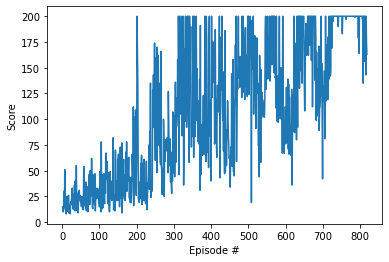

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores))+1, scores)
plt.xlabel('Episode #')
plt.ylabel('Score')
plt.show()

## 4. Watch the trained agent perform the task

In [22]:
env = gym.make('CartPole-v0')

state = env.reset()
for t in range(9000):
    action, _ = policy.act(state)
    state, reward, done, _ = env.step(action)
    env.render()
    if done:
        break

env.close()

## 5. Comments

### 5.1 Implementation

The reason why the ```backward()``` operation in ```PyTorch``` works on categorical probability distributions is explained here: https://pytorch.org/docs/stable/distributions.html

### 5.2 Performance

From the graph of the training scores we can see the REINFORCE algorithm is not very stable. If the random seed for the CartPole-v0 environment or the random seed of the PyTorch library is changed (e.g. try ``env.seed(22)`` with ``torch.manual_seed(0)``) the algorithm will not converge even if we increase the size of the first hidden layer to an arbitrary large number e.g. 1024.

[Proximal Policy Optimization](https://arxiv.org/pdf/1707.06347.pdf) overcomes the limitations of REINFORCE. 